In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [263]:
data=pd.read_csv("Fraud_check.csv")

In [264]:
pd.set_option("display.max_rows",None)
data 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [265]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [266]:
data.tail()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [267]:
data.shape

(600, 6)

In [268]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [269]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [270]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [271]:
data.describe

<bound method NDFrame.describe of     Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
5          NO       Divorced           33329           116382   
6          NO       Divorced           83357            80890   
7         YES         Single           62774           131253   
8          NO         Single           83519           102481   
9         YES       Divorced           98152           155482   
10         NO         Single           29732           102602   
11         NO         Single           61063            94875   
12         NO       Divorced           11794           148033   
13         NO        Married           61830            

In [272]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [273]:
data[data.duplicated()]

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


In [274]:
data.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


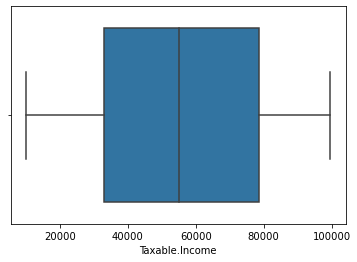

In [275]:
ax = sns.boxplot(data['Taxable.Income'])

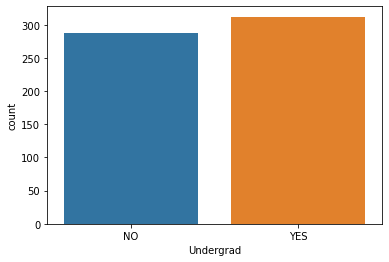

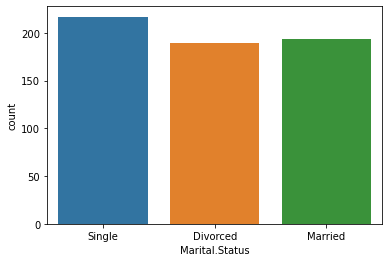

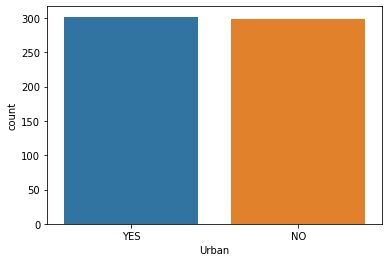

In [276]:
# checking count of categories for categorical columns
sns.countplot(data['Undergrad'])
plt.show()

sns.countplot(data['Marital.Status'])
plt.show()

sns.countplot(data['Urban'])
plt.show()

In [277]:
# Converting Target variable 'Sales' into categories Low, Medium and High.
data['Taxable.Income'] = pd.cut(x=data['Taxable.Income'],bins=[0,30000,100000], labels=['risky','good'], right = False)
data['Taxable.Income']

0       good
1       good
2       good
3       good
4       good
5       good
6       good
7       good
8       good
9       good
10     risky
11      good
12     risky
13      good
14      good
15      good
16     risky
17      good
18      good
19     risky
20      good
21     risky
22      good
23      good
24      good
25      good
26      good
27      good
28     risky
29      good
30      good
31      good
32      good
33      good
34     risky
35      good
36     risky
37      good
38     risky
39      good
40      good
41      good
42      good
43      good
44      good
45      good
46      good
47      good
48     risky
49      good
50      good
51      good
52      good
53     risky
54      good
55     risky
56      good
57      good
58     risky
59      good
60      good
61     risky
62      good
63      good
64      good
65      good
66      good
67      good
68     risky
69      good
70      good
71      good
72      good
73      good
74      good
75      good
76      good

<AxesSubplot:xlabel='Taxable.Income', ylabel='count'>

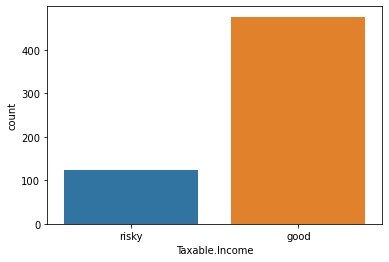

In [278]:
sns.countplot(data['Taxable.Income'])

In [279]:
data['Taxable.Income'].value_counts()

good     476
risky    124
Name: Taxable.Income, dtype: int64

In [280]:
#encoding categorical data
label_encoder = preprocessing.LabelEncoder()

data['Undergrad'] = label_encoder.fit_transform(data['Undergrad'])
data['Marital.Status'] = label_encoder.fit_transform(data['Marital.Status'])
data['Urban'] = label_encoder.fit_transform(data['Urban'])
data['Taxable.Income'] = label_encoder.fit_transform(data['Taxable.Income'])
data 

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0
5,0,0,0,116382,0,0
6,0,0,0,80890,8,1
7,1,2,0,131253,3,1
8,0,2,0,102481,12,1
9,1,0,0,155482,4,1


In [281]:
data.corr()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
Undergrad,1.000000,0.042407,0.012523,0.079579,-0.005362,-0.000267
Marital.Status,0.042407,1.000000,0.006081,-0.001564,-0.002213,0.064562
Taxable.Income,0.012523,0.006081,1.000000,0.012225,-0.001972,0.004830
City.Population,0.079579,-0.001564,0.012225,1.000000,0.013135,-0.040098
Work.Experience,-0.005362,-0.002213,-0.001972,0.013135,1.000000,-0.094559
Urban,-0.000267,0.064562,0.004830,-0.040098,-0.094559,1.000000


In [282]:
# dropping column taxable_income
data1 = data.drop('Taxable.Income', axis = 1)
data1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
5,0,0,116382,0,0
6,0,0,80890,8,1
7,1,2,131253,3,1
8,0,2,102481,12,1
9,1,0,155482,4,1


In [283]:
# Dividing data into independent variables and dependent variable
x = data1.iloc[:,0:]
y = data['Taxable.Income']

In [284]:
x 

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
5,0,0,116382,0,0
6,0,0,80890,8,1
7,1,2,131253,3,1
8,0,2,102481,12,1
9,1,0,155482,4,1


In [285]:
y 

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     1
11     0
12     1
13     0
14     0
15     0
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     0
26     0
27     0
28     1
29     0
30     0
31     0
32     0
33     0
34     1
35     0
36     1
37     0
38     1
39     0
40     0
41     0
42     0
43     0
44     0
45     0
46     0
47     0
48     1
49     0
50     0
51     0
52     0
53     1
54     0
55     1
56     0
57     0
58     1
59     0
60     0
61     1
62     0
63     0
64     0
65     0
66     0
67     0
68     1
69     0
70     0
71     0
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     1
80     0
81     0
82     0
83     0
84     0
85     1
86     0
87     1
88     0
89     1
90     0
91     0
92     0
93     1
94     1
95     0
96     1
97     0
98     1
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    0
109    0
110    1
1

In [286]:
data["Taxable.Income"].unique()

array([0, 1])

In [287]:
# 0 means good, 1 means risky
data['Taxable.Income'].value_counts() 

0    476
1    124
Name: Taxable.Income, dtype: int64

In [288]:
colnames = list(data1.columns)
colnames

['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience', 'Urban']

In [289]:
# Splitting data into training to 80% and testing to 20% in data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=40)

In [290]:
x_train

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
332,1,0,84132,1,0
13,0,1,86649,16,1
274,1,1,112584,25,0
257,1,1,31611,17,1
112,1,2,193038,26,1
558,0,0,191139,12,1
281,0,2,167403,7,1
388,1,0,151636,4,1
45,1,1,183095,14,1
47,1,2,34964,2,0


In [291]:
x_test

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
159,1,2,28504,1,0
307,0,0,31819,25,0
253,1,2,77256,29,0
528,0,1,172612,10,0
137,1,2,115884,6,0
16,1,0,34551,29,0
330,0,1,43176,29,0
433,0,1,129265,14,1
333,1,2,44775,13,1
43,1,0,50020,10,0


In [292]:
y_train

332    0
13     0
274    0
257    0
112    0
558    0
281    0
388    0
45     0
47     0
9      0
196    1
445    0
140    1
66     0
410    0
225    0
277    0
98     1
135    1
275    0
547    0
133    0
569    0
237    1
350    0
168    1
372    0
576    0
366    0
385    0
483    1
419    0
334    0
363    1
328    0
480    0
172    1
192    0
20     0
536    0
213    0
147    0
490    0
194    1
218    0
413    0
342    0
157    0
252    0
259    1
464    0
44     0
381    0
452    0
221    0
390    0
530    0
232    1
139    0
3      0
149    0
212    0
585    0
524    1
143    1
197    0
163    1
222    0
4      0
358    0
104    0
520    0
78     0
380    0
199    1
101    0
438    1
454    0
82     0
146    0
298    0
331    1
28     1
301    1
448    0
379    1
230    1
19     1
466    0
586    0
49     0
463    0
337    1
46     0
290    0
550    0
408    0
36     1
581    0
478    0
116    0
360    0
282    0
498    0
321    0
312    0
54     0
167    0
29     0
279    0
2

In [293]:
y_test

159    0
307    0
253    0
528    0
137    1
16     1
330    0
433    1
333    1
43     0
120    0
110    1
118    1
42     0
591    1
12     1
200    0
508    0
71     0
295    0
552    0
106    1
355    0
15     0
283    0
522    0
566    0
588    0
426    0
291    0
319    0
589    0
374    0
538    0
51     0
169    0
177    0
261    0
84     0
26     0
449    0
457    1
320    0
243    0
476    0
144    0
161    0
0      0
188    1
223    0
580    0
256    0
368    0
269    0
203    0
202    0
336    0
77     0
217    0
396    0
473    0
14     0
471    1
356    1
549    0
185    0
195    0
323    0
561    0
209    0
467    0
544    1
416    0
233    1
293    0
309    0
563    0
238    0
181    1
406    0
150    0
310    0
346    1
48     1
96     1
239    0
318    0
402    0
376    0
93     1
158    1
590    0
262    0
316    0
267    1
154    1
382    0
424    0
534    0
439    1
492    0
564    0
34     1
515    0
519    0
56     0
572    0
141    0
540    1
526    1
132    0
1

## Building Decision Tree Classifier using Entropy Criteria

In [294]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

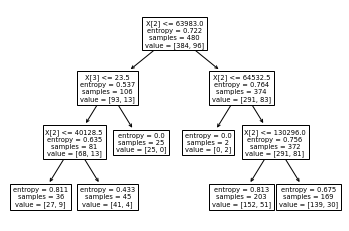

In [295]:
#PLot the decision tree
tree.plot_tree(model);

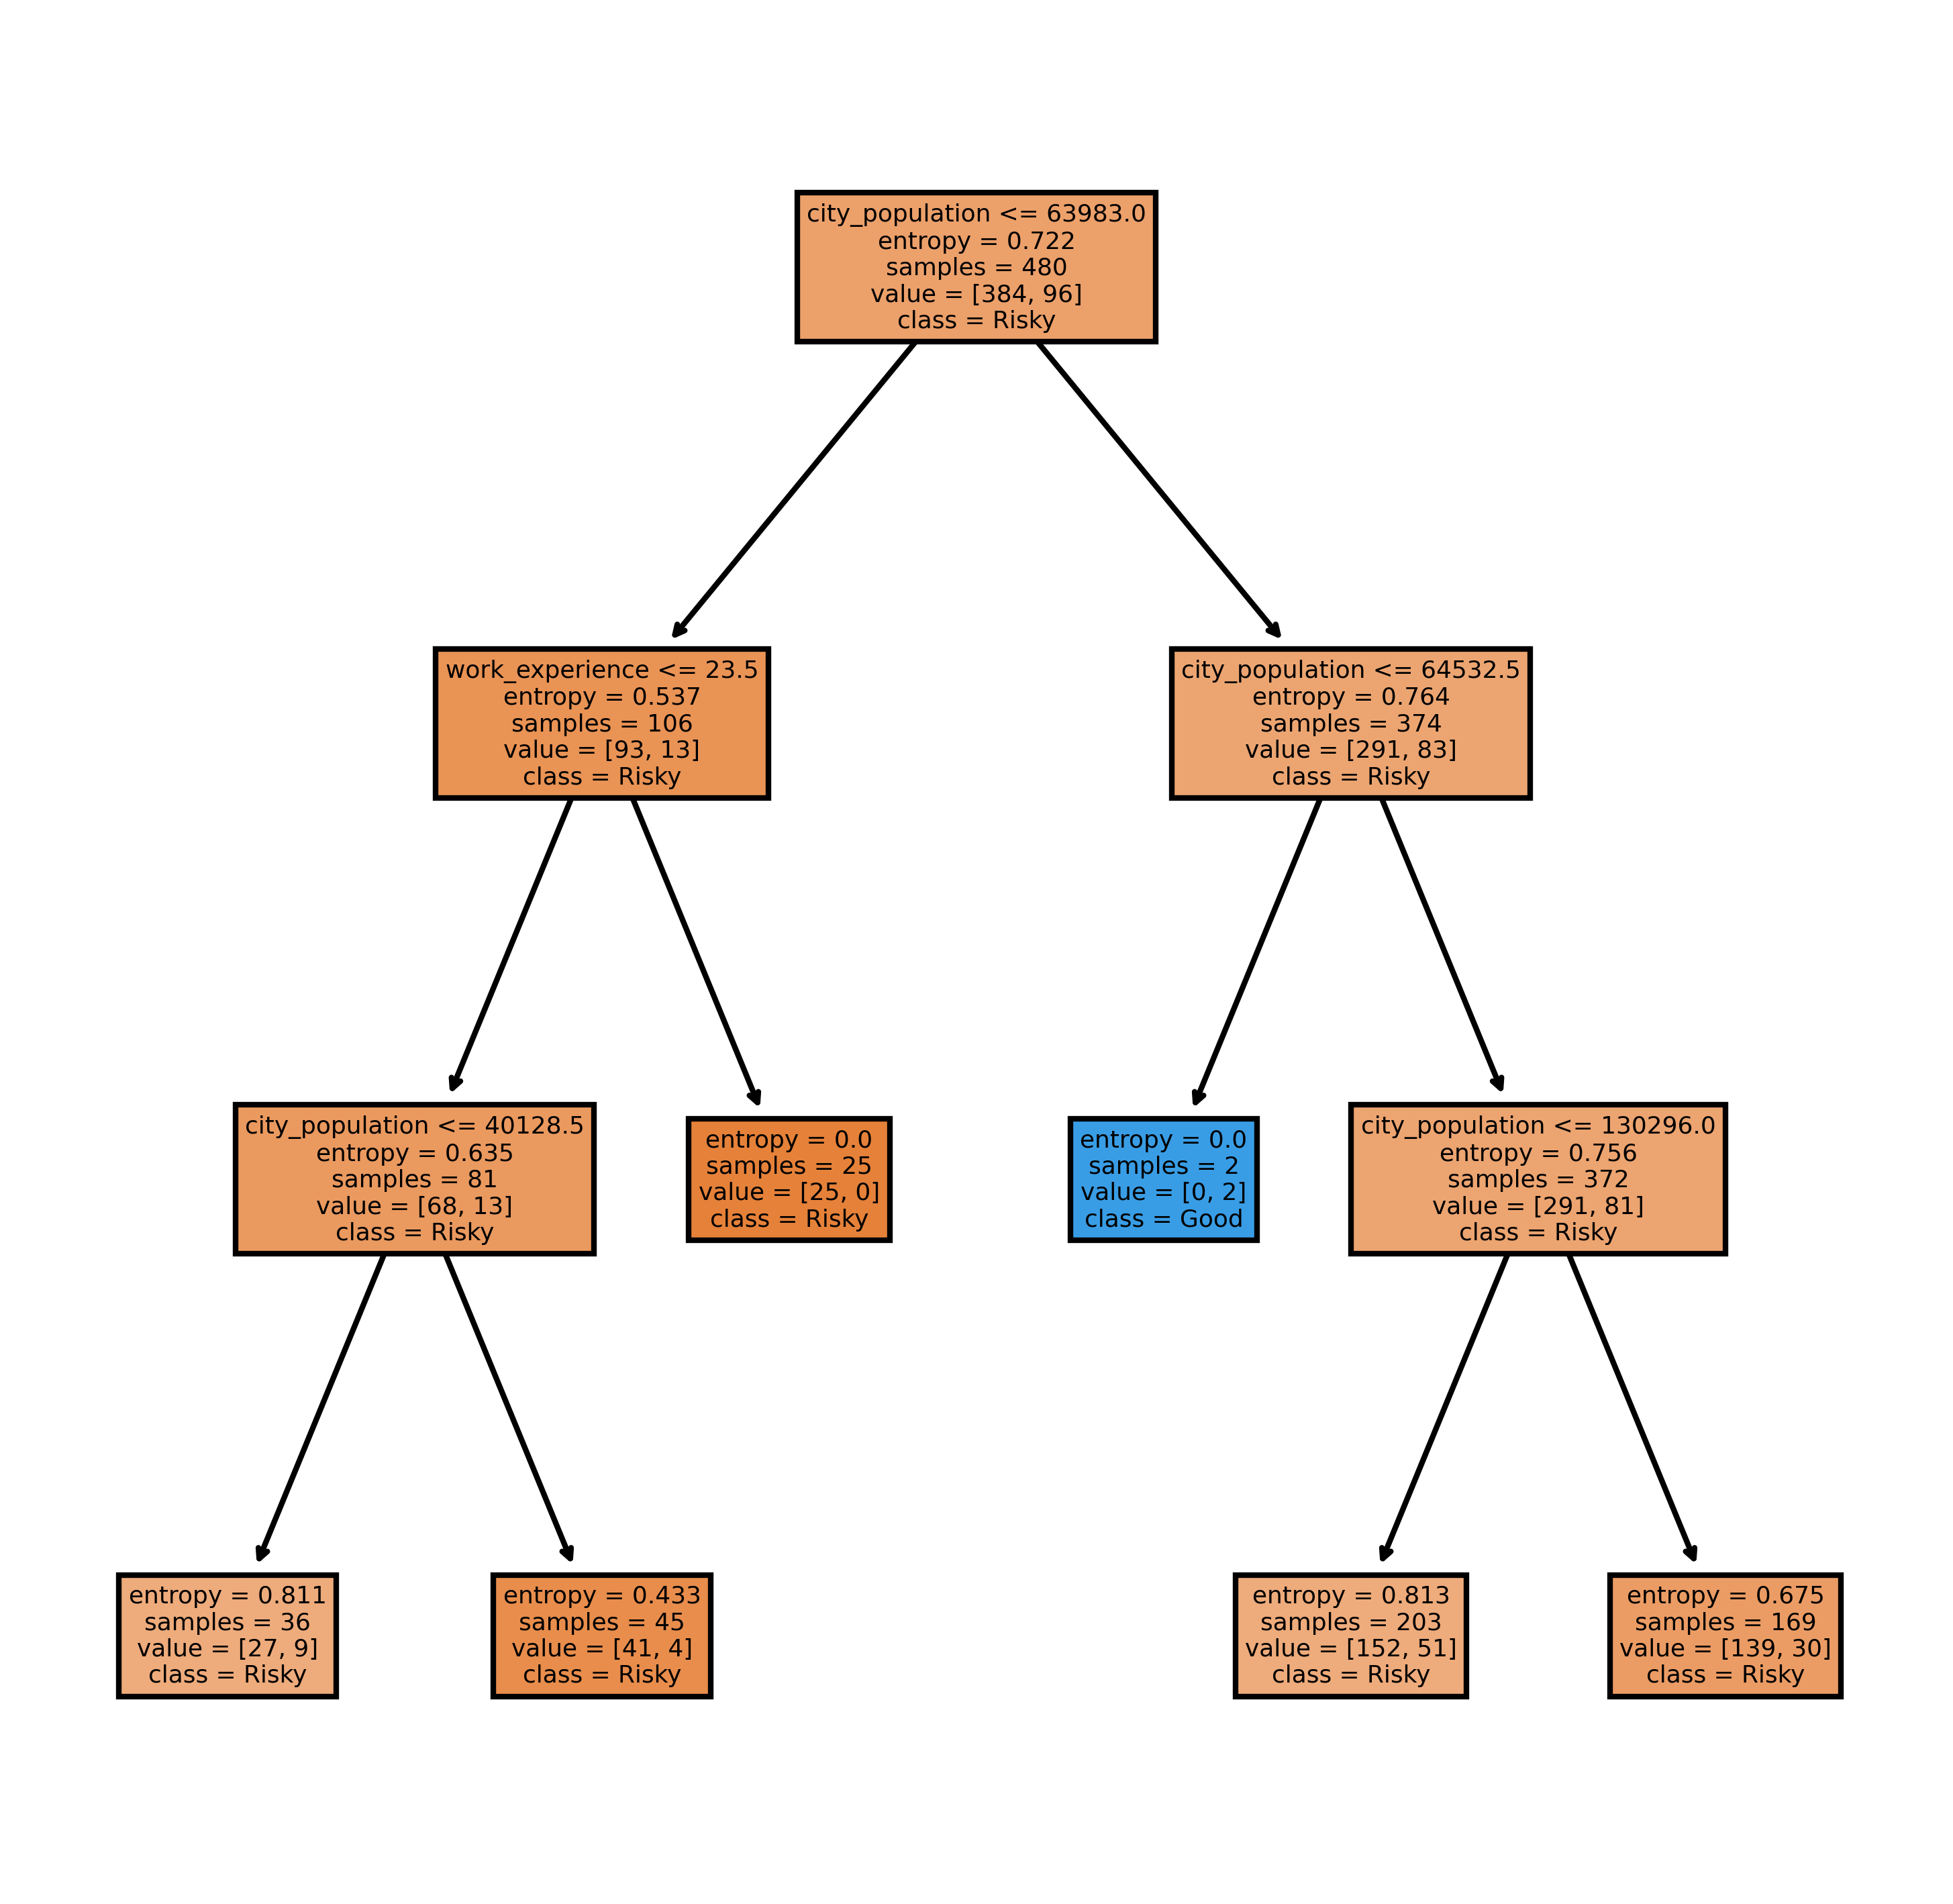

In [296]:
fn=['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [297]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

0    120
dtype: int64

In [298]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [299]:
# getting the 2 way table to understand the correct and wrong predictions
pd.crosstab(y_test,preds)

col_0,0
Taxable.Income,
0,92
1,28


In [300]:
# Accuracy 
np.mean(preds==y_test)

0.7666666666666667

## Building Decision Tree Classifier (CART) using Gini Criteria

In [301]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini

DecisionTreeClassifier(max_depth=3)

In [302]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

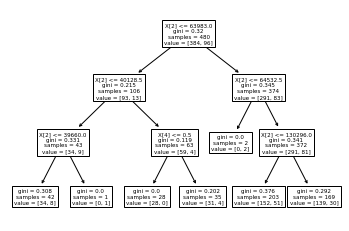

In [303]:
# Plotting Decision tree
tree.plot_tree(model_gini);

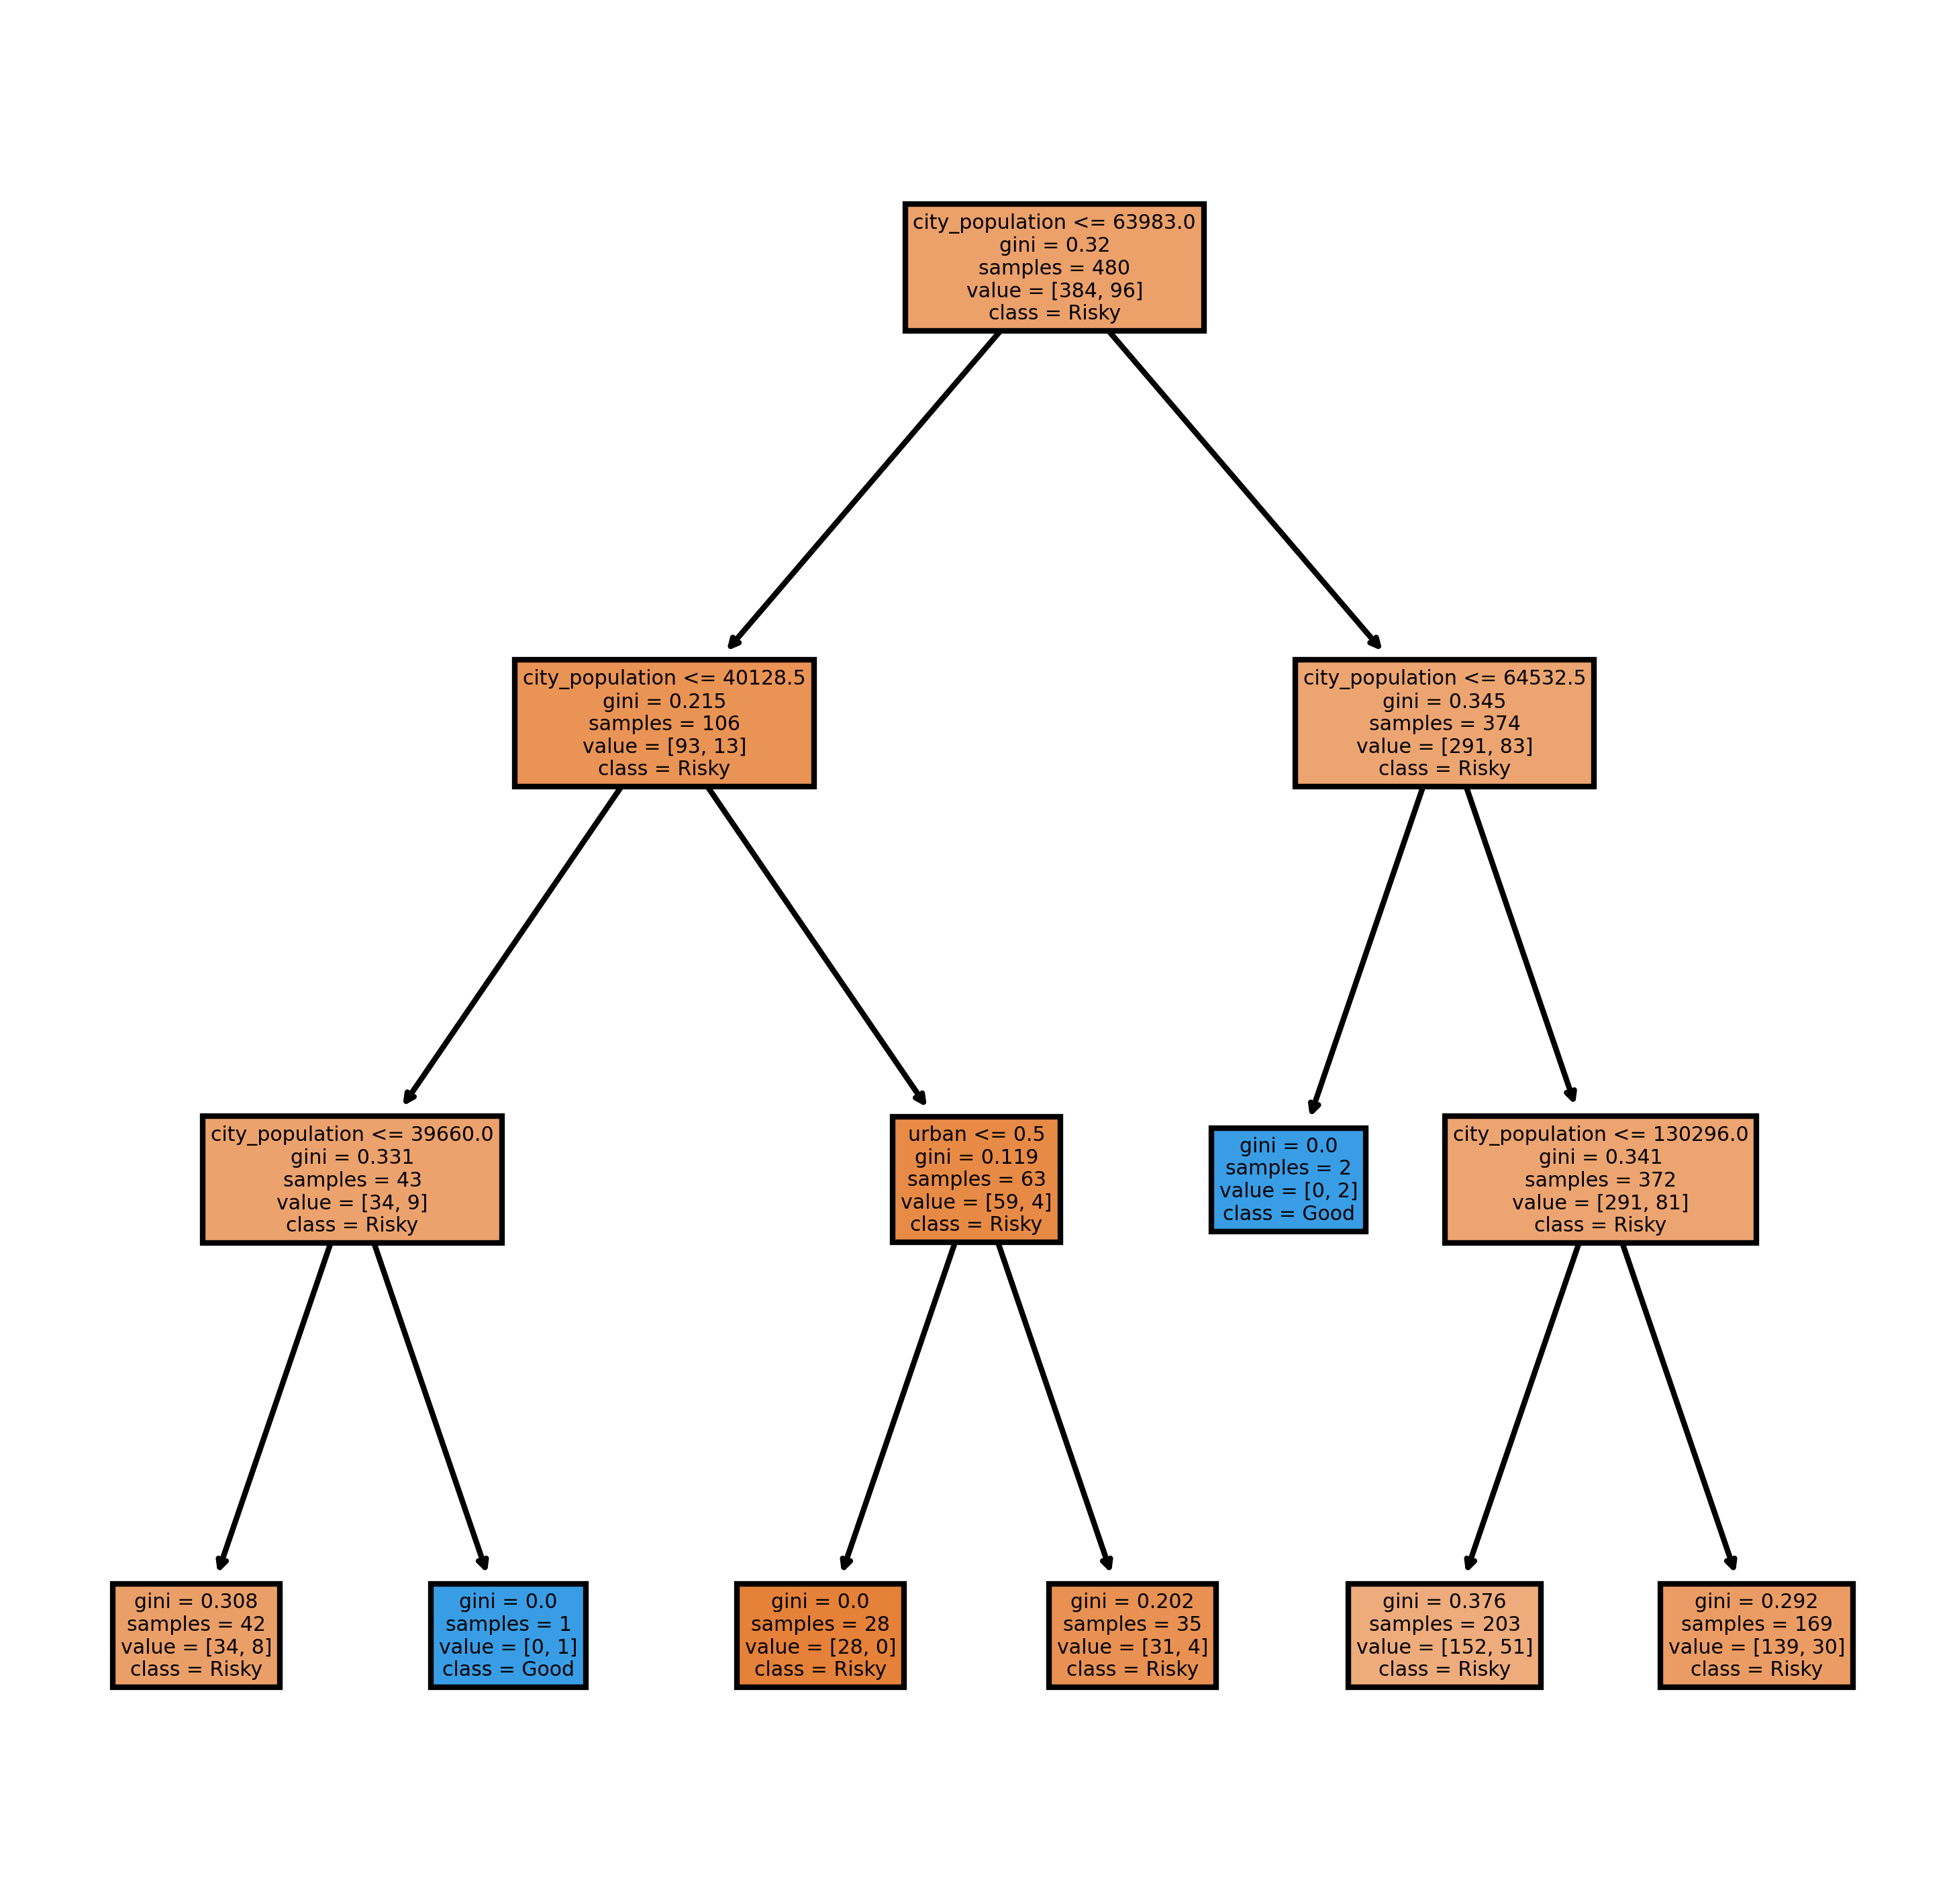

In [304]:
fn=['under_grad', 'marital_status', 'city_population', 'work_experience',
       'urban', 'taxable_category']
cn=['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [305]:
# Predicting Data
preds = model_gini.predict(x_test)
pd.Series(preds).value_counts()

0    119
1      1
dtype: int64

In [306]:
preds 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [307]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1
Taxable.Income,,
0,91,1
1,28,0


In [308]:
# Checking accuracy of model
model_gini.score(x_test, y_test)

0.7583333333333333

## Decision Tree Regression Example

In [309]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor 

In [310]:
array = data.values
X = array[:,0:6]
Y = array[:,2:3] 

In [311]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1) 

In [312]:
model = DecisionTreeRegressor()
model.fit(X_train, Y_train) 

DecisionTreeRegressor()

In [313]:
#Find the accuracy
model.score(X_test,Y_test) 

1.0